In [6]:
import pandas as pd
import numpy as np
#用quatile的方式检测outlier，. todo
#1.先要分辨哪个是categorical variable， 
#2.对于数字值 vairable 用quatile方式检测
def detect_outliers_iqr_all_columns(df):
    """
    Detects outliers in all numeric columns of a DataFrame using the Interquartile Range (IQR) method.

    Parameters:
    df (DataFrame): The Pandas DataFrame containing the data.

    Returns:
    dict: A dictionary where keys are column names and values are lists of indices of the rows in the DataFrame where the column has outliers.
    """
    outliers_dict = {}

    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR

        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outliers_dict[col] = outlier_list_col.tolist()
        #print(df.iloc[outlier_list_col])
    return outliers_dict

# 使用例子:
# df = pd.read_excel('your_file_path_here.xls')
# outliers = detect_outliers_iqr_all_columns(df)


In [7]:
import pandas as pd
def read_file(file_path):
    """
    Reads an Excel file into a DataFrame and applies the outlier detection function on a specified column.

    Parameters:
    file_path (str): The path to the Excel file to be read.
    feature (str): The name of the feature (column) in the DataFrame to check for outliers.

    Returns:
    DataFrame, list: The DataFrame loaded from the file and a list of indices where outliers are found.
    """
    # Read the file into a DataFrame
    df = pd.read_excel(file_path)
    return df

In [8]:
file_path = 'C:\\Users\\34894\\Desktop\\cardiff\\Copy of TrainDataset2023.xls'

df=read_file(file_path)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假设您已经有了一个DataFrame 'df'
# df = pd.read_excel('your_file_path_here.xls')

def plot_boxplot(df, column):
    """
    Draws a boxplot for a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The name of the column to plot.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# 使用示例
# plot_boxplot(df, 'YourColumnName')


In [10]:


def delete_rows_with_value(df, value=999):
    """
    Deletes rows in a DataFrame where the specified column has a given value.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The name of the column to check for the specified value.
    value (int, optional): The value that if found in the specified column, the row will be deleted. Defaults to 999.

    Returns:
    DataFrame: A DataFrame with the rows removed where the column had the specified value.
    """
    for column in df.columns:
        # Find indices of rows with the specified value
        indices_to_remove = df[df[column] == value].index

        # Drop these rows from the DataFrame
        df_cleaned = df.drop(indices_to_remove).reset_index(drop=True)  # 重置索引
        df=df_cleaned   
    return df_cleaned
# 使用示例
# df = pd.read_excel('your_file


In [11]:
#indices_to_remove = df[df['pCR (outcome)'] == 999].index
#df_cleaned = df.drop(indices_to_remove).reset_index(drop=True)
#print(indices_to_remove) 
#print(len(df_cleaned))
#indices_to_remove = df[df['RelapseFreeSurvival (outcome)'] == 999].index
#df_cleaned = df.drop(indices_to_remove).reset_index(drop=True)

NameError: name 'indices_to_remove' is not defined

In [12]:
df_cleaned=delete_rows_with_value(df, value=999)
print(len(df_cleaned),len(df))
num_columns = len(df.columns)
print("DataFrame 中的列数:", num_columns)


390 400
DataFrame 中的列数: 120


In [13]:
# 导入必要的库
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 假设 X 和 y_target 是你的数据


# 定义特征变量和目标变量
X = df_cleaned[['ER', 'PgR', 'HER2', 'TrippleNegative', 'ChemoGrade', 'Proliferation', 'HistologyType', 'LNStatus', 'TumourStage']]
y_target = df_cleaned['pCR (outcome)']

# 将数据分为训练集和测试集
# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.2, random_state=42)




NameError: name 'decision_tree' is not defined

In [24]:
!pip install -U imbalanced-learn


     -------------------------------------- 257.7/257.7 kB 2.3 MB/s eta 0:00:00
     ------------------------------------- 302.2/302.2 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [29]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# 初始化SMOTE对象
sm = SMOTE(random_state=42)

# 对训练数据集进行过采样
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# 检查类别平衡情况
print('Before SMOTE:', Counter(y_train))
print('After SMOTE:', Counter(y_train_res))
X_train=X_train_res
y_train=y_train_res

Before SMOTE: Counter({1: 245, 0: 245})
After SMOTE: Counter({1: 245, 0: 245})


              precision    recall  f1-score   support

           0       0.80      0.70      0.75        63
           1       0.17      0.27      0.21        15

    accuracy                           0.62        78
   macro avg       0.49      0.48      0.48        78
weighted avg       0.68      0.62      0.64        78



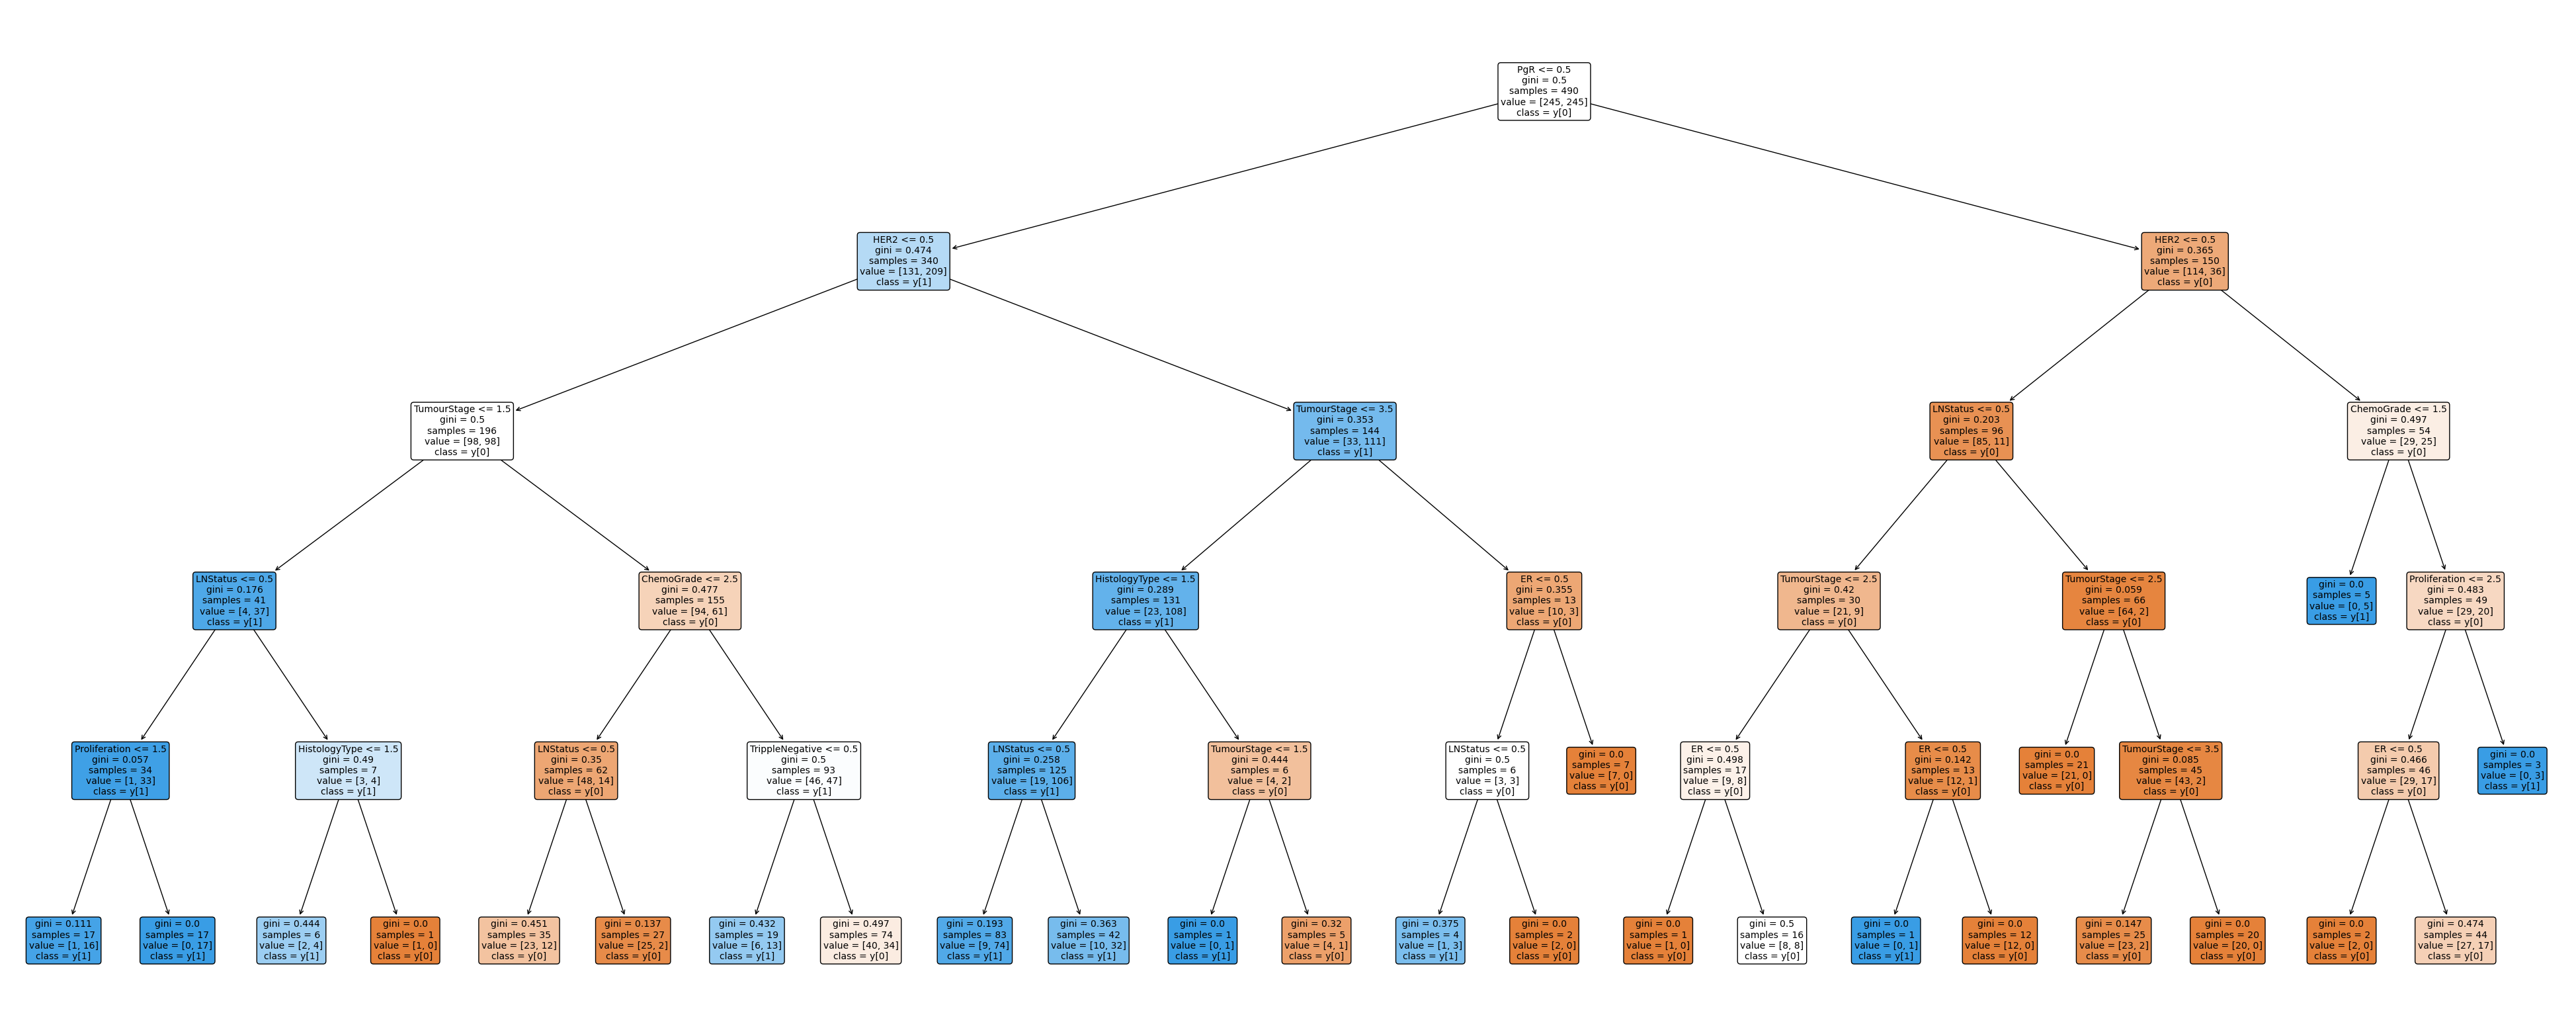

In [34]:
# 绘制决策树
# 创建决策树模型
decision_tree = DecisionTreeClassifier(max_depth=5)

# 训练模型
decision_tree.fit(X_train, y_train)

# 在测试集上预测
y_pred = decision_tree.predict(X_test)
# 打印分类报告
report = classification_report(y_test, y_pred)
print(report)
plt.figure(figsize=(50,20))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=True, rounded=True,max_depth=5)
plt.show()
#以下图片value = [245, 67] 表示在此节点中，有245个样本属于第一个类别，有67个样本属于第二个类别
#gini，一开始数据集就不平衡，todo...

In [33]:
import pandas as pd
from scipy.stats import chi2_contingency
#It does not directly measure the combined effect of two variables (X and Y) on a third variable (y_target)
for feature in X.columns:
    contingency_table = pd.crosstab(X[feature], y_target)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Feature: {feature}")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p}\n")
    if p > 0.05:
        print(f"Suggests that there is no significant association between {feature} and y_target")
    else:
        print(f"The association between {feature} and pcr_outcome is considered statistically significant")
    print("\n")

Feature: ER
Chi-Square Statistic: 16.966829662135673
P-value: 3.803861507137925e-05

The association between ER and pcr_outcome is considered statistically significant


Feature: PgR
Chi-Square Statistic: 15.834982893891999
P-value: 6.911283805720374e-05

The association between PgR and pcr_outcome is considered statistically significant


Feature: HER2
Chi-Square Statistic: 17.451233825609016
P-value: 2.947729040598557e-05

The association between HER2 and pcr_outcome is considered statistically significant


Feature: TrippleNegative
Chi-Square Statistic: 2.0168178731902406
P-value: 0.15556485158642763

Suggests that there is no significant association between TrippleNegative and y_target


Feature: ChemoGrade
Chi-Square Statistic: 2.922108641988794
P-value: 0.2319915521803808

Suggests that there is no significant association between ChemoGrade and y_target


Feature: Proliferation
Chi-Square Statistic: 7.7209592101197995
P-value: 0.02105789762652219

The association between Prolifer

In [33]:
#explain the appropriate method to test the combined effect of a categorical predictor (X) on a categorical target variable (y_target)
#logists regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
reg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
reg_model.fit(X_train, y_train)
y_reg_pred = reg_model.predict(X_test)
print(classification_report(y_test, y_reg_pred))
#分析以下结果....怎么解决不平衡数据集的问题
# 获取测试集上的预测概率
y_scores = reg_model.predict_proba(X_test)
#print(y_scores[:, 0])
# 计算不同阈值的精确率和召回率
'''
precision, recall, thresholds = precision_recall_curve(y_test, y_scores[:, 1])  # 假设正类标签为1

# 选择一个新的阈值，例如根据你的需求，这里我们选择召回率和精确率的平衡点
# 注意：这里需要根据实际情况来选择合适的阈值
threshold = thresholds[np.argmax(precision + recall)]

# 根据新阈值重新确定类别
y_pred_new_threshold = (y_scores[:, 1] >= threshold).astype(int)

# 输出新阈值下的分类报告
print(classification_report(y_test, y_pred_new_threshold))
'''

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        63
           1       0.31      0.60      0.41        15

    accuracy                           0.67        78
   macro avg       0.59      0.64      0.59        78
weighted avg       0.77      0.67      0.70        78



'\nprecision, recall, thresholds = precision_recall_curve(y_test, y_scores[:, 1])  # 假设正类标签为1\n\n# 选择一个新的阈值，例如根据你的需求，这里我们选择召回率和精确率的平衡点\n# 注意：这里需要根据实际情况来选择合适的阈值\nthreshold = thresholds[np.argmax(precision + recall)]\n\n# 根据新阈值重新确定类别\ny_pred_new_threshold = (y_scores[:, 1] >= threshold).astype(int)\n\n# 输出新阈值下的分类报告\nprint(classification_report(y_test, y_pred_new_threshold))\n'

In [35]:
# 获取特征系数
coefficients = reg_model.coef_[0]  # 对于二元分类，使用 [0]

# 将特征名与其系数配对
feature_importance = zip(X_train.columns, coefficients)

# 打印每个特征的系数
for feature, coef in feature_importance:
    print(f'{feature}: {coef}')
#The coefficient is positive, indicating a positive correlation. 
#This suggests that an increase in this feature may increase the probability of the sample being classified as the positive class.

ER: -0.5083003839083285
PgR: -0.5868458079874829
HER2: 0.5419142032907287
TrippleNegative: -0.4625250926676656
ChemoGrade: -0.3533069736254249
Proliferation: 0.30948256626986975
HistologyType: -0.5731597203426972
LNStatus: -0.43411037354514476
TumourStage: -0.309926696923453


C:\Users\34894\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\34894\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\34894\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\34894\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

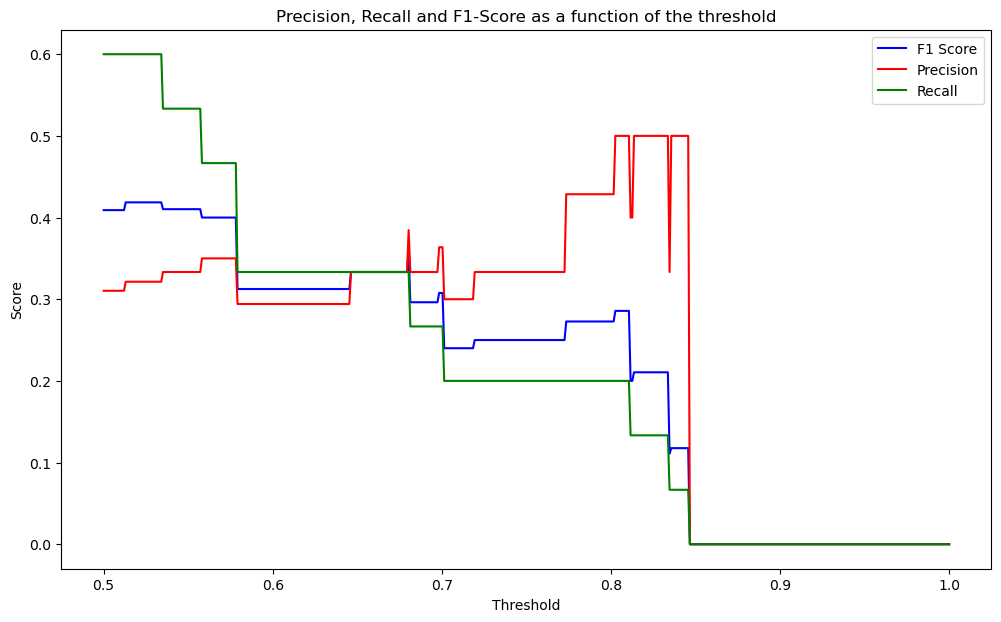

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score
# 生成阈值从0.5到1的序列
thresholds = np.linspace(0.5, 1, num=500)

# 初始化列表来存储阈值对应的精确度、召回率和F1分数
precision_scores = []
recall_scores = []
f1_scores_adjusted = []

# 计算每个阈值下的指标
for t in thresholds:
    y_pred_adjusted = (y_scores[:,1] >= t).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_adjusted))
    recall_scores.append(recall_score(y_test, y_pred_adjusted))
    f1_scores_adjusted.append(f1_score(y_test, y_pred_adjusted))

# 绘制图像
plt.figure(figsize=(12, 7))

# 绘制F1分数随阈值变化的图像
plt.plot(thresholds, f1_scores_adjusted, label='F1 Score', color='blue')

# 绘制精确度随阈值变化的图像
plt.plot(thresholds, precision_scores, label='Precision', color='red')

# 绘制召回率随阈值变化的图像
plt.plot(thresholds, recall_scores, label='Recall', color='green')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Precision, Recall and F1-Score as a function of the threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')

# 显示图像
plt.show()

In [36]:
#outlier 测试
outliers = detect_outliers_iqr_all_columns(df_remove999)
del outliers['pCR (outcome)']
outliers

{'RelapseFreeSurvival (outcome)': [0, 1, 2, 5, 6, 8, 9],
 'Age': [],
 'ER': [],
 'PgR': [293],
 'HER2': [293],
 'TrippleNegative': [293],
 'ChemoGrade': [224, 260, 266],
 'Proliferation': [224, 260],
 'HistologyType': [6,
  11,
  13,
  40,
  41,
  44,
  45,
  46,
  51,
  62,
  66,
  77,
  78,
  82,
  86,
  90,
  103,
  111,
  116,
  128,
  130,
  148,
  150,
  158,
  173,
  174,
  175,
  179,
  180,
  181,
  190,
  195,
  199,
  204,
  210,
  221,
  224,
  229,
  242,
  244,
  249,
  260,
  264,
  266,
  275,
  301,
  307,
  310,
  313,
  320,
  322,
  324,
  330,
  332,
  334,
  336,
  338,
  339,
  362,
  367,
  379],
 'LNStatus': [387],
 'TumourStage': [],
 'original_shape_Elongation': [64, 86, 339],
 'original_shape_Flatness': [],
 'original_shape_LeastAxisLength': [69,
  101,
  139,
  145,
  148,
  188,
  212,
  215,
  216,
  227,
  231,
  246,
  309],
 'original_shape_MajorAxisLength': [64,
  77,
  101,
  121,
  172,
  206,
  215,
  219,
  226,
  227,
  232,
  242,
  339,
  344],

In [34]:
def replace_outliers_with_median(df, outliers_dict):
    """
    Replaces outliers in the DataFrame with the median of their respective column based on the provided outliers dictionary.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    outliers_dict (dict): A dictionary where keys are column names and values are lists of row indices with outliers.

    Returns:
    DataFrame: The DataFrame with outliers replaced by the median of their respective column.
    """
    for col, indices in outliers_dict.items():
        if indices:  # If there are outliers in the column
            median_value = df[col].median()  # Compute the median of the column
            df.loc[indices, col] = median_value  # Replace outliers with the median
    return df

# 使用示例
# outliers = {'RelapseFreeSurvival (outcome)': [0, 1, 2, 5, 6, 8, 9], 'Age': []}
# df_cleaned = replace_outliers_with_median(df, outliers)


In [39]:
#categorical variable用median 方式替换999是有问题的
df_cleaned=replace_outliers_with_median(df_remove999, outliers)
df_cleaned.iloc[293]['PgR']

0